<img src="../files/misc/logo.png" width=300/>
<h1 style="color:#872325"> Time Series Pandas </h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = (12, 3)

In [3]:
bmv = pd.read_csv("../files/lec02/ipc0019.csv")
bmv.head()

,date,ticker,field,value
0,2017-06-07,BBAJIOO MF Equity,PX_LAST,29.50
1,2017-06-08,BBAJIOO MF Equity,PX_LAST,30.14
2,2017-06-08,BBAJIOO MF Equity,PX_LOW,29.75
3,2017-06-08,BBAJIOO MF Equity,PX_OPEN,29.50
4,2017-06-08,BBAJIOO MF Equity,PX_HIGH,30.70


In [4]:
bmv.ticker.unique()

array(['BBAJIOO MF Equity', 'ALPEKA MF Equity', 'FEMSAUBD MF Equity',
       'WALMEX* MF Equity', 'KIMBERA MF Equity', 'MEGACPO MF Equity',
       'OMAB MF Equity', 'BOLSAA MF Equity', 'GAPB MF Equity',
       'GCC* MF Equity', 'LIVEPOLC MF Equity', 'GFINBURO MF Equity',
       'CEMEXCPO MF Equity', 'GENTERA* MF Equity', 'BIMBOA MF Equity',
       'IENOVA* MF Equity', 'CUERVO* MF Equity', 'AMXL MF Equity',
       'ASURB MF Equity', 'GMEXICOB MF Equity', 'ALSEA* MF Equity',
       'ELEKTRA* MF Equity', '1746531D GZ Equity', 'GFNORTEO MF Equity',
       'GCARSOA1 MF Equity', 'PE&OLES* MF Equity', 'KOFUBL MF Equity',
       'TLEVICPO MF Equity', 'GRUMAB MF Equity', 'AC* MF Equity',
       'RA MF Equity', 'ALFAA MF Equity', 'LABB MF Equity',
       'BSMXB MF Equity', 'PINFRA* MF Equity'], dtype=object)

### De long DataFrame a serie de tiempo

In [5]:
bmv = bmv.pivot_table(values="value",
                      index="date",
                      columns=["ticker", "field"])
bmv.head()

ticker     1746531D GZ Equity                                          \
field                 PX_HIGH PX_LAST PX_LOW PX_MID PX_OPEN PX_VOLUME   
date                                                                    
2000-01-03                NaN     NaN    NaN    NaN     NaN       NaN   
2000-01-04                NaN     NaN    NaN    NaN     NaN       NaN   
2000-01-05                NaN     NaN    NaN    NaN     NaN       NaN   
2000-01-06                NaN     NaN    NaN    NaN     NaN       NaN   
2000-01-07                NaN     NaN    NaN    NaN     NaN       NaN   

ticker     AC* MF Equity                        ... TLEVICPO MF Equity         \
field            PX_HIGH PX_LAST PX_LOW PX_MID  ...             PX_LOW PX_MID   
date                                            ...                             
2000-01-03           NaN     NaN    NaN    NaN  ...              30.44  30.50   
2000-01-04           NaN     NaN    NaN    NaN  ...              27.30  27.45   
2000-01-05           NaN     NaN    NaN    NaN  ...              25.90  27.15   
2000-01-06           NaN     NaN    NaN    NaN  ...              27.00  27.08   
2000-01-07           NaN     NaN    NaN    NaN  ...              26.75  28.35   

ticker                        WALMEX* MF Equity                                \
field      PX_OPEN  PX_VOLUME           PX_HIGH PX_LAST PX_LOW PX_MID PX_OPEN   
date                                                                            
2000-01-03   32.20   680000.0              5.14    4.90   4.75   4.89    4.78   
2000-01-04   28.80  2980000.0              4.83    4.82   4.73   4.83    4.80   
2000-01-05   26.80  3430000.0              5.25    5.21   4.70   5.30    4.80   
2000-01-06   27.30   850000.0              5.34    5.18   5.13   5.18    5.24   
2000-01-07   26.98  2210000.0              5.63    5.51   5.19   5.69    5.19   

ticker                  
field        PX_VOLUME  
date                    
2000-01-03  17132000.0  
2000-01-04  20296000.0  
2000-01-05  20372000.0  
2000-01-06  22904000.0  
2000-01-07  23512000.0  

[5 rows x 210 columns]

In [6]:
walmex_ticker = "WALMEX* MF Equity"
walmex = bmv[walmex_ticker]
walmex.head()

field,PX_HIGH,PX_LAST,PX_LOW,PX_MID,PX_OPEN,PX_VOLUME
date,,,,,,
2000-01-03,5.14,4.90,4.75,4.89,4.78,17132000.0
2000-01-04,4.83,4.82,4.73,4.83,4.80,20296000.0
2000-01-05,5.25,5.21,4.70,5.30,4.80,20372000.0
2000-01-06,5.34,5.18,5.13,5.18,5.24,22904000.0
2000-01-07,5.63,5.51,5.19,5.69,5.19,23512000.0


Los índices de de este dataframe no son de tipo `datetime`

In [7]:
walmex.index

Index(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
       '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13', '2000-01-14',
       ...
       '2019-09-12', '2019-09-13', '2019-09-17', '2019-09-18', '2019-09-19',
       '2019-09-20', '2019-09-23', '2019-09-24', '2019-09-25', '2019-09-26'],
      dtype='object', name='date', length=4983)

In [8]:
type(walmex.index[0])

str

A fin de poder trabajar eficientemente entre fechas, necesitaríamos que cada fecha dentro de nuestro índice sea de tipo `datetime`. Para lograr esto, haremos uso de la función `pd.to_datetime`, pandas se encarga de tomar cada uno de los elementos  y transformarlos en tipo`datetime64`de Numpy.

In [9]:
date_index = pd.to_datetime(walmex.index)
date_index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2019-09-12', '2019-09-13', '2019-09-17', '2019-09-18',
               '2019-09-19', '2019-09-20', '2019-09-23', '2019-09-24',
               '2019-09-25', '2019-09-26'],
              dtype='datetime64[ns]', name='date', length=4983, freq=None)

In [10]:
# Asingamos una nueva serie de índices
walmex.index = date_index
walmex.head()

field,PX_HIGH,PX_LAST,PX_LOW,PX_MID,PX_OPEN,PX_VOLUME
date,,,,,,
2000-01-03,5.14,4.90,4.75,4.89,4.78,17132000.0
2000-01-04,4.83,4.82,4.73,4.83,4.80,20296000.0
2000-01-05,5.25,5.21,4.70,5.30,4.80,20372000.0
2000-01-06,5.34,5.18,5.13,5.18,5.24,22904000.0
2000-01-07,5.63,5.51,5.19,5.69,5.19,23512000.0


### Indexando sobre fechas

Al tener un pandas dataframe o un pandas Series en donde el índice es de tipo `datetime`, podemos indexar sobre las fechas con diferentes formatos:

In [11]:
walmex.loc["2019-01-10"]

field
PX_HIGH            50.19
PX_LAST            48.92
PX_LOW             48.86
PX_MID             49.01
PX_OPEN            49.88
PX_VOLUME    15797850.00
Name: 2019-01-10 00:00:00, dtype: float64

In [12]:
walmex.loc["20190110"]

field
PX_HIGH            50.19
PX_LAST            48.92
PX_LOW             48.86
PX_MID             49.01
PX_OPEN            49.88
PX_VOLUME    15797850.00
Name: 2019-01-10 00:00:00, dtype: float64

In [13]:
walmex.loc["2019/01/10"]

field
PX_HIGH            50.19
PX_LAST            48.92
PX_LOW             48.86
PX_MID             49.01
PX_OPEN            49.88
PX_VOLUME    15797850.00
Name: 2019-01-10 00:00:00, dtype: float64

In [14]:
walmex.loc[datetime(2019, 1, 10)]

field
PX_HIGH            50.19
PX_LAST            48.92
PX_LOW             48.86
PX_MID             49.01
PX_OPEN            49.88
PX_VOLUME    15797850.00
Name: 2019-01-10 00:00:00, dtype: float64

De igual manera, podemos indexar sobre un rango de fechas. En este caso, pandas se encarga de considerar los límites iniciales y finales. 

In [15]:
walmex.loc["2019-01-01": "2019-01-10"]

field,PX_HIGH,PX_LAST,PX_LOW,PX_MID,PX_OPEN,PX_VOLUME
date,,,,,,
2019-01-02,50.10,49.72,49.50,49.70,50.00,8458077.0
2019-01-03,49.97,48.75,48.08,48.72,49.60,11658870.0
2019-01-04,49.77,49.66,48.32,49.61,48.87,13444941.0
2019-01-07,50.31,49.84,49.40,49.78,49.78,10977557.0
2019-01-08,50.70,50.52,49.85,50.49,49.99,13400223.0
2019-01-09,50.83,49.88,49.58,50.06,50.26,29915112.0
2019-01-10,50.19,48.92,48.86,49.01,49.88,15797850.0


In [16]:
walmex.loc[datetime(2019, 1, 1): "2019-01-10"]

field,PX_HIGH,PX_LAST,PX_LOW,PX_MID,PX_OPEN,PX_VOLUME
date,,,,,,
2019-01-02,50.10,49.72,49.50,49.70,50.00,8458077.0
2019-01-03,49.97,48.75,48.08,48.72,49.60,11658870.0
2019-01-04,49.77,49.66,48.32,49.61,48.87,13444941.0
2019-01-07,50.31,49.84,49.40,49.78,49.78,10977557.0
2019-01-08,50.70,50.52,49.85,50.49,49.99,13400223.0
2019-01-09,50.83,49.88,49.58,50.06,50.26,29915112.0
2019-01-10,50.19,48.92,48.86,49.01,49.88,15797850.0


Otra manera en la pandas nos permite obtener un rango de elementos es por medio de fechas parciales.

In [17]:
# Especificamos año y mes de interés
walmex.loc["2018-9"]

field,PX_HIGH,PX_LAST,PX_LOW,PX_MID,PX_OPEN,PX_VOLUME
date,,,,,,
2018-09-03,53.26,52.57,52.40,52.70,52.69,2125774.0
2018-09-04,53.22,53.01,52.57,52.88,52.73,9568015.0
2018-09-05,52.98,52.60,52.22,52.64,52.65,8490778.0
2018-09-06,52.81,52.68,52.17,52.64,52.46,10691672.0
2018-09-07,52.60,52.25,51.62,52.24,52.52,8231233.0
2018-09-10,52.90,52.76,51.86,52.79,52.42,7376649.0
2018-09-11,53.55,53.26,52.32,53.09,52.40,15275725.0
2018-09-12,53.33,52.67,52.36,52.61,53.13,15867670.0
2018-09-13,54.78,54.53,52.56,54.51,52.88,20027660.0


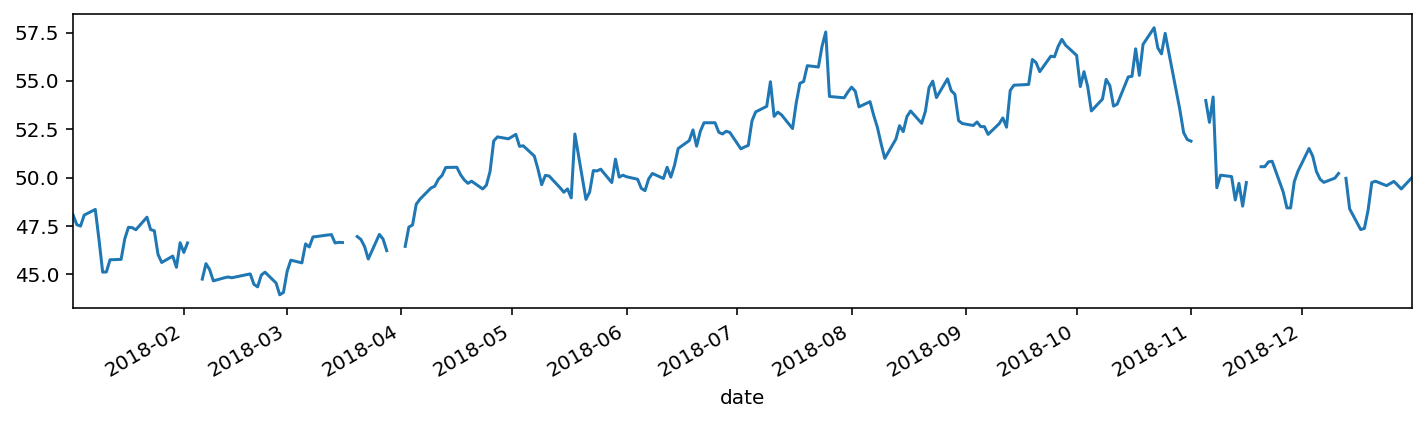

In [18]:
# Especificamos año de interés
walmex.loc["2018", "PX_MID"].plot()

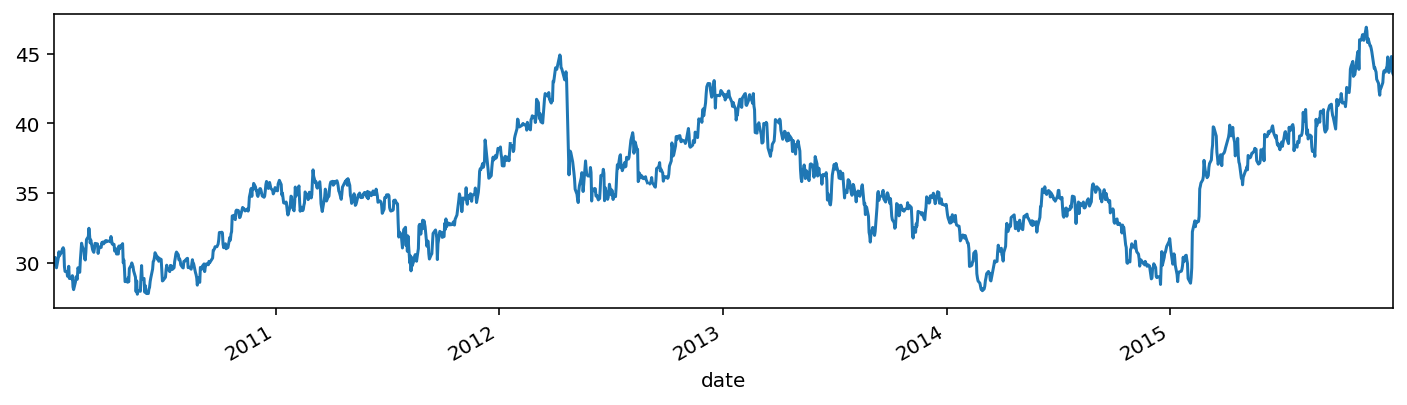

In [19]:
# Especificamos un rango de años de interés
walmex.loc["2010": "2015", "PX_MID"].plot()

## _Resampling_

Las series de tiempo en pandas se asumen irregulares, i.e., no tienen una frequencia específicia. Sin embargo, en ocasiones en necesario tener una serie de tiempo que contenga en el índice una frequencia fija, e.g., mes, día, segundo, etc.

Al hacer un _resampling_, transformamos una serie de tiempo con alguna (o ninguna) frecuencia en una que sí lo tenga:
1. **Downsampling**: Agregar datos de una frecuencia a una más alta (De día a año)
2. **Upsamping**: convertir una serie de tiempo a una con menor frequencia (de año a día)

In [20]:
# 2017-04-01: Lunes
sample = walmex.loc["2017-04-01": "2017-04-20", "PX_LAST"]
sample

date
2017-04-03    43.50
2017-04-04    43.57
2017-04-05    43.12
2017-04-06    43.16
2017-04-07    43.20
2017-04-10    43.54
2017-04-11    44.00
2017-04-12    43.95
2017-04-13      NaN
2017-04-17    44.09
2017-04-18    43.82
2017-04-19    43.92
2017-04-20    44.37
Name: PX_LAST, dtype: float64

In [21]:
# Frequencia por día. Si no existe información a una fecha dada
# resample().mean() regresa un NaN.
sample.resample("D").mean()

date
2017-04-03    43.50
2017-04-04    43.57
2017-04-05    43.12
2017-04-06    43.16
2017-04-07    43.20
2017-04-08      NaN
2017-04-09      NaN
2017-04-10    43.54
2017-04-11    44.00
2017-04-12    43.95
2017-04-13      NaN
2017-04-14      NaN
2017-04-15      NaN
2017-04-16      NaN
2017-04-17    44.09
2017-04-18    43.82
2017-04-19    43.92
2017-04-20    44.37
Freq: D, Name: PX_LAST, dtype: float64

In [22]:
# sábado
datetime(2017, 4, 8).weekday()

5

In [23]:
# Frequencia por día entre semana (Business Day)
sample.resample("B").mean()

date
2017-04-03    43.50
2017-04-04    43.57
2017-04-05    43.12
2017-04-06    43.16
2017-04-07    43.20
2017-04-10    43.54
2017-04-11    44.00
2017-04-12    43.95
2017-04-13      NaN
2017-04-14      NaN
2017-04-17    44.09
2017-04-18    43.82
2017-04-19    43.92
2017-04-20    44.37
Freq: B, Name: PX_LAST, dtype: float64

### Upsampling 
Hacer _upsampling_ a una serie de tiempo introduce, en muchas ocasiones, intervalos de tiempo sin información. Si deseamos interpolar empíricamente los valores sin información, podemos llenar estos valores de dos maneras en pandas:
* `ffill`: propaga la última observación hasta el siguiente valor conocido
* `bfill`: propaga la siguiente observación a una fecha conocida sobre el rango sin información

In [24]:
upsample = sample.resample("D").asfreq()
ffill = upsample.ffill()
bfill = upsample.bfill()

pd.DataFrame({
    "upsample": upsample,
    "ffill": ffill,
    "bfill": bfill
})

,upsample,ffill,bfill
date,,,
2017-04-03,43.50,43.50,43.50
2017-04-04,43.57,43.57,43.57
2017-04-05,43.12,43.12,43.12
2017-04-06,43.16,43.16,43.16
2017-04-07,43.20,43.20,43.20
2017-04-08,NaN,43.20,43.54
2017-04-09,NaN,43.20,43.54
2017-04-10,43.54,43.54,43.54
2017-04-11,44.00,44.00,44.00


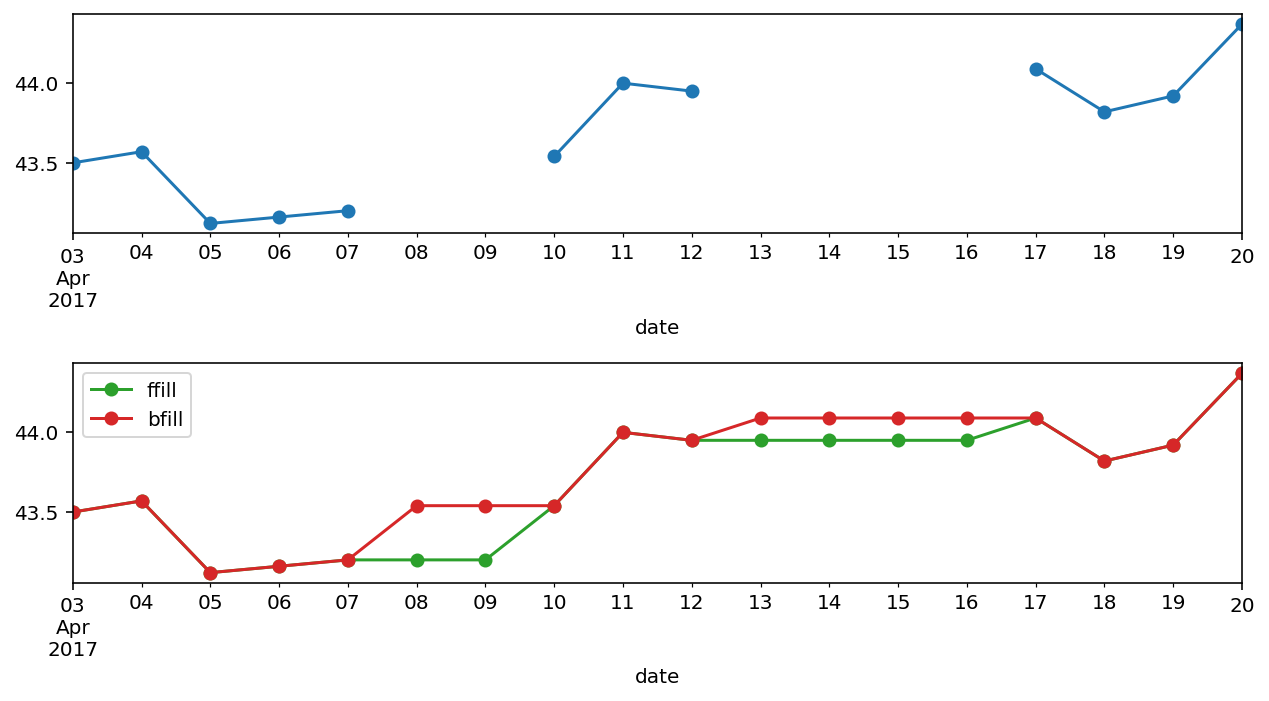

In [25]:
fig, ax = plt.subplots(2,1, figsize=(9, 5))

upsample.plot(ax=ax[0], marker="o")
ffill.plot(ax=ax[1], label="ffill", c="tab:green", marker="o")
bfill.plot(ax=ax[1], label="bfill", c="tab:red", marker="o")
ax[1].legend(fontsize=10)
plt.tight_layout();

### Downsampling

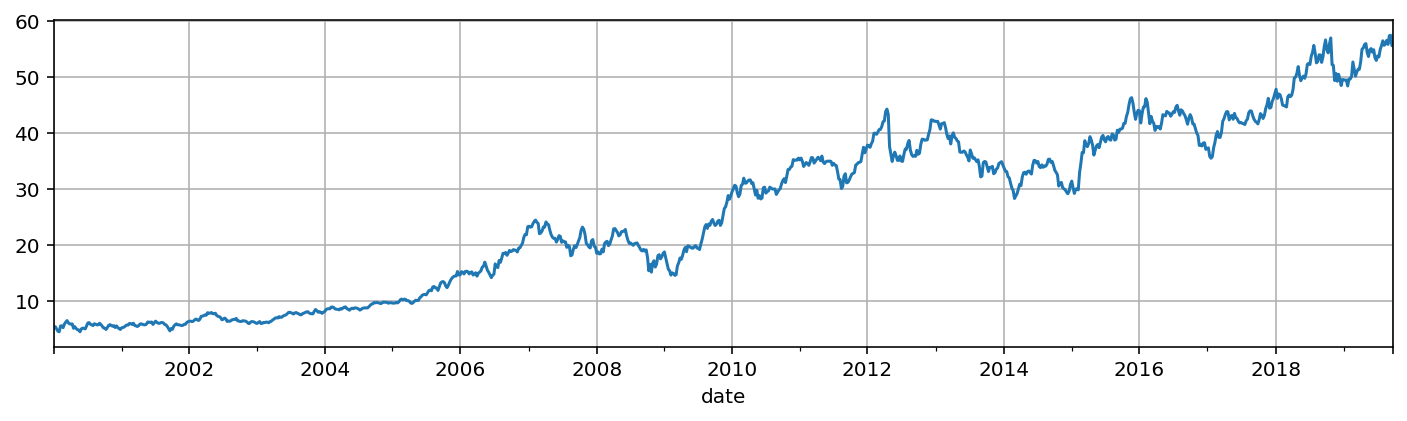

In [26]:
# Agrupando valores por semana
walmex["PX_LAST"].resample("W").mean().plot()
plt.grid()

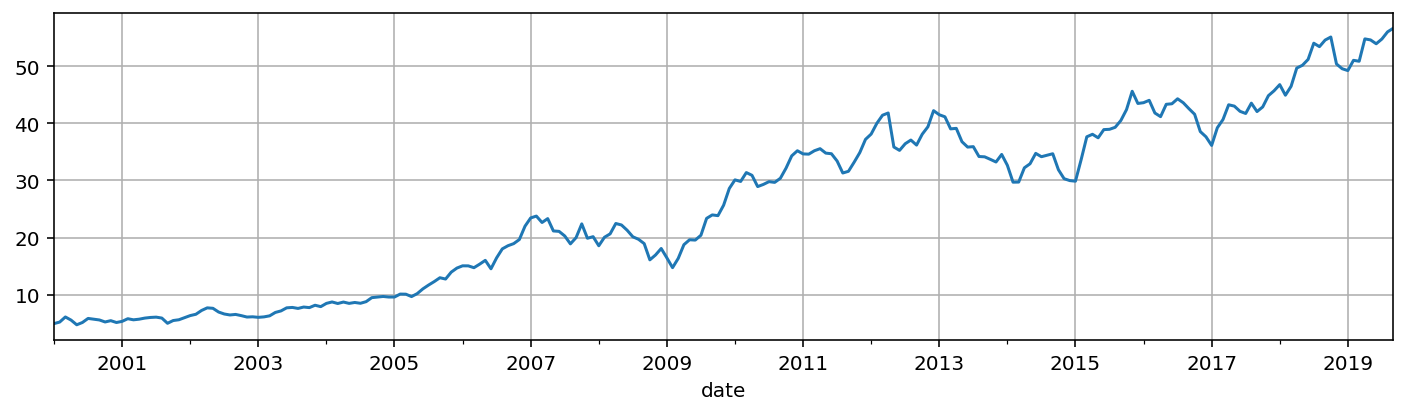

In [27]:
# Agrupando valores por (final de) mes
walmex["PX_LAST"].resample("M").mean().plot()
plt.grid()

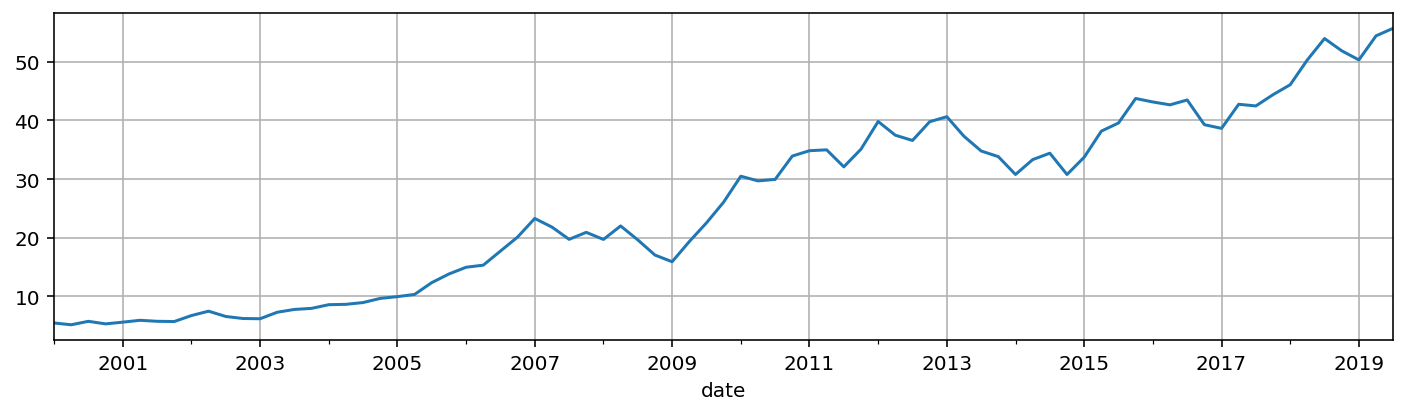

In [28]:
# Agrupando valores por (final de) trimestre
walmex["PX_LAST"].resample("Q").mean().plot()
plt.grid()

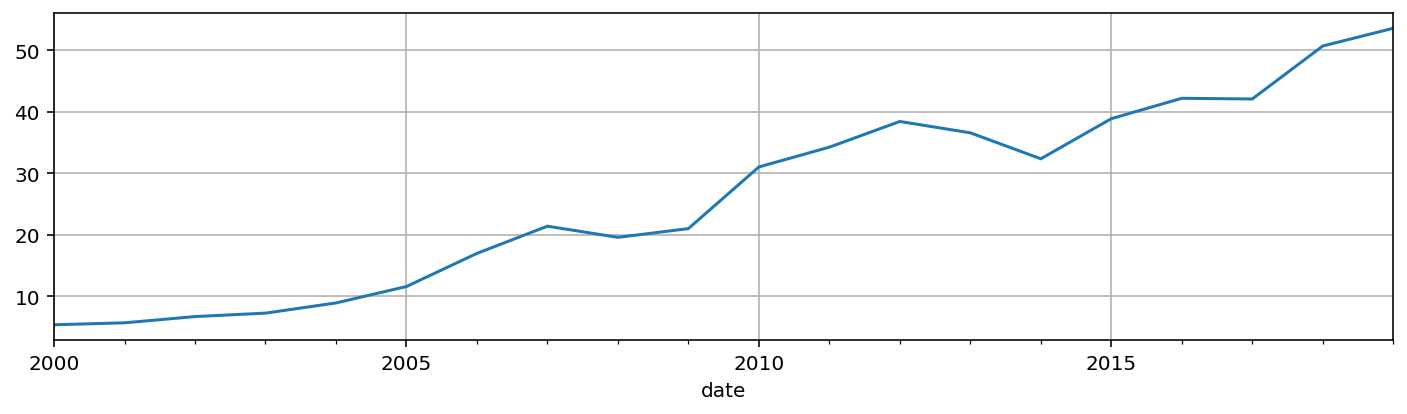

In [29]:
# Agrupando valores por (final de) año
walmex["PX_LAST"].resample("Y").mean().plot()
plt.grid()

### Rolling functions

Las funciones que hemos visto hasta ahora agrupan los valores a través del tiempo considerando períodos de tiempo. ¿Qué sucecedería si quisieramos hacer una análisis por ventanas? Para esto, hacemos uso del método rolling para un pandas Series.

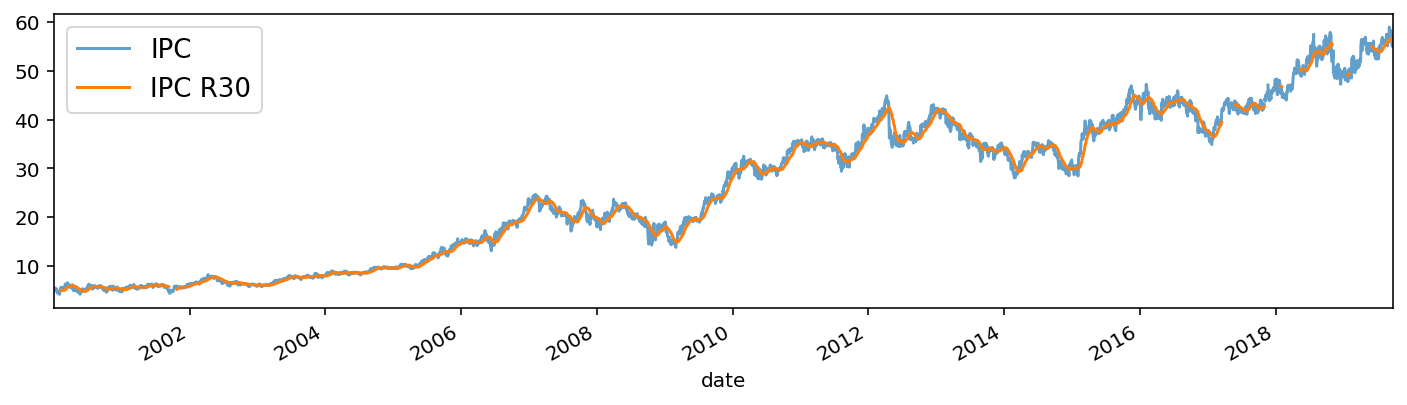

In [30]:
walmex["PX_LAST"].plot(label="IPC", alpha=0.7)
walmex["PX_LAST"].rolling(30).mean().plot(label="IPC R30")
plt.legend(fontsize=13)

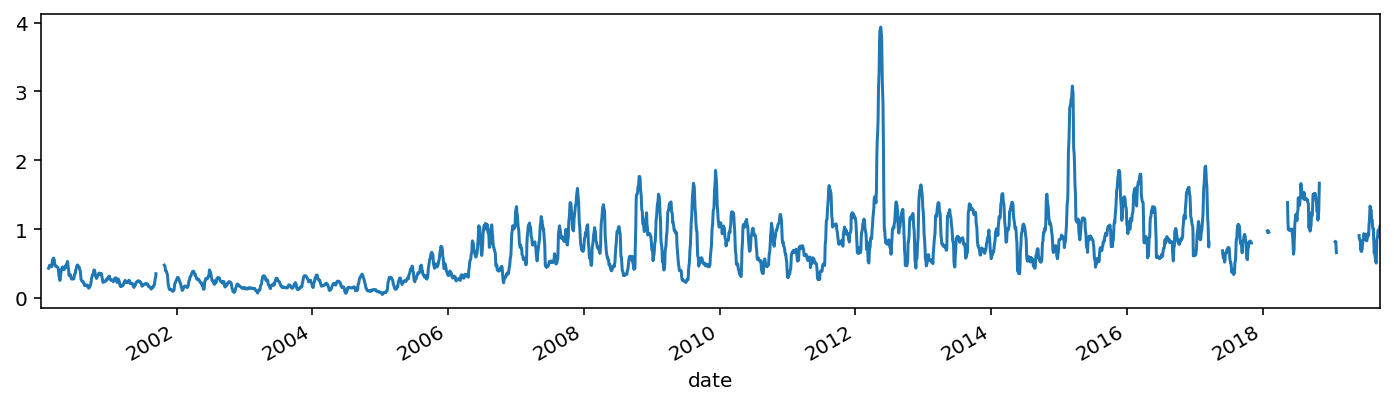

In [31]:
walmex["PX_LAST"].rolling(30).std().plot()

<h2 style="color:crimson">Ejercicios</h2>

En los ejercicios 1 a 5 analizaremos la volatilidad CEMEX (`"CEMEXCPO MF Equity"`).

1. Declara la variable `cemex_close` siendo esta la columna `PX_LAST` dentro del DataFrame `bmv`; transforma el índice de `cemex_close` a fin de que sea un `DateTimeIndex`; posteriormente, declara la variable `cemex_diff` que contenga la diferencia de precios entre un día y el siguiente (**hint**: ocupa el método `shift`)

Crea una figure usando matplotlib con 2 columnas: la primera columna deberá ser el histórico de `cemex_diff`; la segunda columna, un histograma de `cemex_diff` con `bins=20`.


----

2. Realiza un _downsampling_ de `cemex_diff`: calcula la desviación estándar por trimestre del inicio de la historia hasta el 1 de junio de 2018. Guarda la información dentro la variable `cemex_std` y grafica un histograma con `bins=20`

---

3. Realiza nuevamente el ejercicio 3 calculando en este caso la desviación estándar por semana. ¿Qué diferencias observas entre las dos distribuciones de volatilidad?

---

4. En este ejercicio analizaremos la volatilidad por mes considerando `cemex_diff`. Corre el siguiente código y explica que hace:

```python
months = cemex_diff.index.strftime("%B")
cemex_diff.groupby(months).mean().plot(kind="bar")
```

¿Cómo podrías explicar la gráfica resultante?

---

5. Realiza nuevamente el ejercicio 4 considerando `cemexs_last`. ¿Por qué difieren las gráficas?
